# Trabajo práctico integrador de IAR 2023

### Curso: 5K1
### Grupo: 14
### Integrantes:  
###Aramayo, Marilina  -  70463
###Capovilla, Luisina  - 67999
###Galizio, Matias  -   65155
###Marc, Florencia  -   60060



# Enunciado

## Objetivos académicos

Con este trabajo práctico (TP) se busca ejercitar y evaluar, en situaciones similares a las reales, las siguientes capacidades:
 * Manipulación de datos.
 * Elección, ajuste y evaluación de modelos de clasificación.
 * Interpretación y comunicación de los resultados.




## Problema a resolver

El objetivo particular del TP es clasificar laptops según el tamaño de su memoria RAM. Concretamente, predecir si determinada laptop tiene 16 GB de RAM o más.

Los datos pertenecen al dataset **Laptops Price Dataset**. El dataset está  disponible en [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset), pero no es necesario extraerlo porque la carga ya está resuelta en este notebook.

**Detalles**:

* El atributo *Final Price* no se debe utilizar.
* Se deben completar todas las secciones (de "Preprocesamiento", incluída, para abajo) del notebook.
* Los datos se deben dividir en dos datasets, entrenamieno y validación. El dataset de validación debe contener el 25% de los datos y ambos deben tener la misma proporción de cada clase.

## Grupos

El TP es grupal.

Los grupos pueden contener **como máximo 4 integrantes**. Como trabajo es el mismo para todos los cursos de IAR, se adminten integrantes de distintos cursos.

Todos los integrantes deben comprender y ser capaces de explicar el trabajo completo.

**Formalización de los grupos**. La conformación de cada grupo de debe informar en [este formulario](https://forms.gle/Qn9755h5wLokTkyf9).

El orden de la carga de los grupos determina la fecha de presentación (no de entrega) del TP. Los primeros grupos en cargar el formulario exponen el último día y viceversa.


## Entregables

* **Notebook**. El presente notebook es un template para relizar el trabajo. Se debe hacer una copia, cargar los datos del encabezado, completar todas las secciones y subir un link al portafolio de cada uno de los integrantes antes de la fecha límite. Los notebooks no se deben editar después de la fecha de entrega.

* **Informe**. Se debe escribir un informe que incluya:
  * Una descripción de los datos y del problema a resolver.
  * Un resumen de lo realizado.
  * Si se utilizaron métodos no vistos en clases, una explicación resumida de los mismos.
  * Problemas encontrados en el camino.
  * Conclusión del TP.
  
  Por simplicidad, el informe se debe escribir al final del notebook.

* **Exposición**. Presentación ante la clase del trabajo realizado.
  * El documento usado para la presentación se debe cargar en el portafolio de todos los integrantes.
  * Durante la presentación también es necesario tener el notebook abierto para mostrar algunos detalles del trabajo.

## Evaluación

Los criterios de evaluación en la [rúbrica](https://docs.google.com/spreadsheets/d/12pJD_Q_9iiCFLuy71Ha-xELHXRfqJcFP9uVsZRyb5A4/edit?usp=sharing) .

## Fechas

* Creación de los grupos: desde el 15/08/2023
* Entrega final de todos los entregables: Ver en la UV
* Fecha de 1ra presentación: Ver en la UV
* Fecha de 2da presentación: Ver en la UV

# Lectura de los datos

In [729]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

datos = pd.read_csv(urllib.request.urlopen("https://drive.google.com/uc?id=1-pktH7BqyjQ4VKHP1tH8VWY8pu2BVKt0"))

# Preprocesamiento

## Importante:

Los pasos que se encuentran a continuación (antes de la clasificación) son muy importantes en los problemas de este tipo. Queda a elección de los grupos qué hacen en cada uno. Pueden omitirlos, cambiarlos de órden y/o agregar nuevas tareas, como el balanceado de las clases por ejemplo, pero cada decisión tomada (qué no se hace, qué sí se hace y cómo se lo hace) se debe fundamentar.

## Exploración de los datos

(distribución, correlación, visualización, etc.)

En una primera instancia realizamos un análisis de las estadísticas básicas para los valores numéricos del dataset.

In [730]:
#Resumen de los datos:
datos.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [731]:
datos.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [732]:
datos.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


### Resumen de cantidad de datos en el dataset inicial

In [733]:
datos.count()

Laptop          2160
Status          2160
Brand           2160
Model           2160
CPU             2160
RAM             2160
Storage         2160
Storage type    2118
GPU              789
Screen          2156
Touch           2160
Final Price     2160
dtype: int64

#### Análisis de valores únicos para la característica RAM

In [734]:
valores_ram = datos['RAM'].unique()
valores_ram

array([  8,  16,  32,  12,   4,  64, 128,   6,  40], dtype=int64)

#### Distribución de valores para memoria RAM

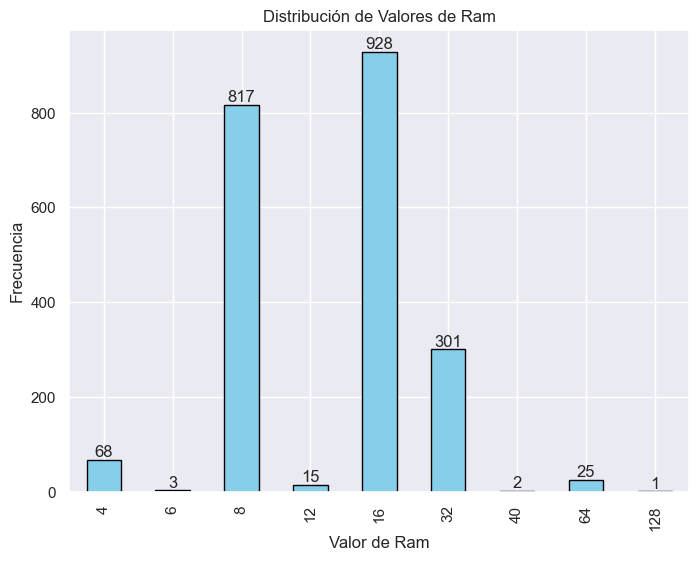

In [735]:
ram_distribution = datos['RAM'].value_counts().sort_index()

# Crea un gráfico de barras
plt.figure(figsize=(8, 6))
ax = ram_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Valor de Ram')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores de Ram')

# Muestra el gráfico de barras
plt.show()

#### Distribución de valores para espacio de almacenamiento

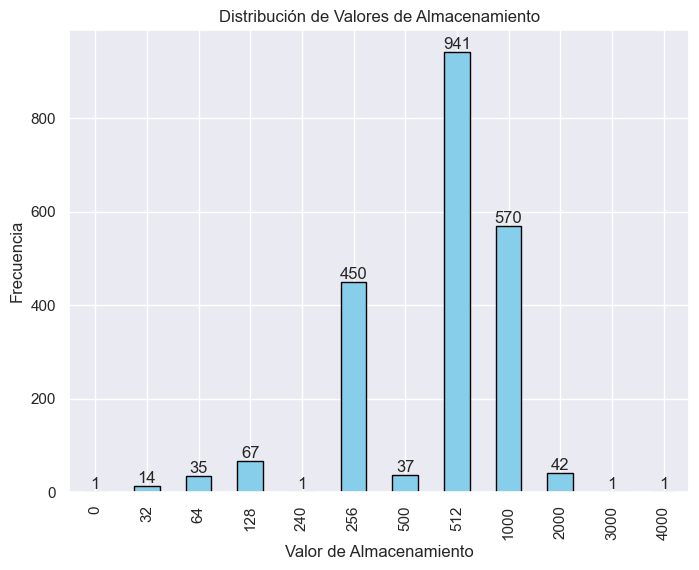

In [736]:
storage_distribution = datos['Storage'].value_counts().sort_index()

# Crea un gráfico de barras
plt.figure(figsize=(8, 6))
ax = storage_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Valor de Almacenamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores de Almacenamiento')

# Muestra el gráfico de barras
plt.show()

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

En una primera instancia, hicimos un análisis sobre los tipos de datos de las distintas columnas del set de datos original. A partir de eso, nos encontramos con que el set de datos está compuesto por un total de 12 columnas, de las cuales únicamente 4 de ellas son numéricas.
Además, analizando tanto el contenido de los primeros registros del set de datos, como los gráficos de barras generados, pudimos ver que 11 de las 12 columnas son categóricas, si bien algunas de esas características son numéricas, se consideran cualitativas debido a que contienen pocos valores distintos discretos que se repiten una gran cantidad de veces, la única variable cuantitativa es 'Final Price'.
Cabe aclarar que optamos por utilizar gráficos de barras en lugar de histogramas para describir las distribuciones de los datos debido a que, si bien son variables numéricas se comportan como variables categóricas.


## Imputación de valores faltantes

In [737]:

# Calcula la cantidad de valores nulos en cada columna
null_counts = datos.isnull().sum()

# Calcula la cantidad total de elementos en cada columna
total_counts = datos.count()

# Crea un DataFrame para mostrar la información
info_df = pd.DataFrame({'Cantidad de Valores Nulos': null_counts, 'Cantidad Total de Elementos': total_counts})

# Muestra la tabla de información
info_df

,Cantidad de Valores Nulos,Cantidad Total de Elementos
Laptop,0,2160
Status,0,2160
Brand,0,2160
Model,0,2160
CPU,0,2160
RAM,0,2160
Storage,0,2160
Storage type,42,2118
GPU,1371,789
Screen,4,2156


In [738]:
#Eliminación de registros a los que les falta el storage type
datos =  datos.dropna(subset=['Storage type'])

In [739]:
#Registros sin tamaño de pantalla registrado
datos[datos["Screen"].isna()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
624,Acer Extensa 15 EX215-54 Intel Core i5-1135G7/...,New,Acer,Extensa,Intel Core i5,8,256,SSD,NaN,NaN,No,524.99
1430,HP ENVY x360 2-in-1 Laptop 15-ew0008np Intel C...,New,HP,Envy,Intel Core i7,16,512,SSD,RTX 2050,NaN,Yes,1863.52
1503,Lenovo IdeaPad Gaming 3 15ACH6 AMD Ryzen 5 560...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,RTX 3060,NaN,No,1505.00
1548,Lenovo ThinkPad P15 Gen 2 Intel Core i7-11850H...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A2000,NaN,No,2569.00


In [740]:
#Completado de valores faltantes para columna Screen

datos.at[624, 'Screen'] = 15.6
datos.at[1430, 'Screen'] = 15.6
datos.at[1503, 'Screen'] = 15.6
datos.at[1548, 'Screen'] = 15.6

In [741]:
#Reemplazar valores faltantes de columna GPU por "N/A"

datos["GPU"] = datos["GPU"].fillna("N/A")


In [742]:
# Calcula la cantidad de valores nulos en cada columna
null_counts = datos.isnull().sum()

# Calcula la cantidad total de elementos en cada columna
total_counts = datos.count()

# Crea un DataFrame para mostrar la información
info_df = pd.DataFrame({'Cantidad de Valores Nulos': null_counts, 'Cantidad Total de Elementos': total_counts})

# Muestra la tabla de información
info_df

,Cantidad de Valores Nulos,Cantidad Total de Elementos
Laptop,0,2118
Status,0,2118
Brand,0,2118
Model,0,2118
CPU,0,2118
RAM,0,2118
Storage,0,2118
Storage type,0,2118
GPU,0,2118
Screen,0,2118


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

Tras realizar un análisis sobre los registros 2160 registros iniciales del dataset nos encontramos con que a 4 de ellos les faltaba completar el campo "Screen", a 42 de ellos les faltaba el campo "Storage Type" y a 1371 les faltaba el campo "GPU".
En el caso del campo "Screen" decidimos que la mejor solución fue buscar los datos sobre los modelos de Laptops a los que le faltaba ese valor y completarlo a mano. Para el campo "Storage Type" decidimos eliminar los registros a los que les faltaba este valor por una cuestión de administración de tiempo, principalmente porque al no ser una cantidad significativa respecto a la cantidad total de registros la eliminación de 42 registros no tendrá un impacto severo en el resultado final del análisis.
Por último, tras analizar algunos de los registros de forma minuciosa nos encontramos que el hecho de que algunos registros no contengan un valor para "GPU" nos indica que el dispositivo en cuestión no contiene un procesador gráfico discreto (únicamente posee el procesador gráfico integrado en el microprocesador), por lo que un registro faltante no quiere decir que al set de datos le falte información, sino que por el contrario, es parte de la información que proveen los registros.

## Codificación de variables categóricas y Escalado, estandarizado o normalización

In [743]:
#ANALISIS DE VARIABLES CATEGORICAS
columnas_interes = ['Brand', 'Model', 'Status', 'Storage type', 'CPU', 'GPU', 'Touch', 'Storage', 'RAM']

# Crear una lista para almacenar los DataFrames individuales
frames = []

# Iterar sobre las columnas de interés y obtener los valores distintos
for columna in columnas_interes:
    valores_distintos = datos[columna].unique()
    valores_distintos_str = ', '.join(map(str, valores_distintos))
    frame = pd.DataFrame({'Columna': [columna], 'Valores Distintos': [valores_distintos_str]})
    frames.append(frame)

# Concatenar los DataFrames individuales en uno solo
resultados = pd.concat(frames, ignore_index=True)

# Mostrar la tabla con los valores distintos de manera amigable
resultados.style.set_properties(**{'text-align': 'left'})

,Columna,Valores Distintos
0,Brand,"Asus, Alurin, MSI, HP, Lenovo, Medion, Acer, Apple, Razer, Gigabyte, Dell, LG, Samsung, PcCom, Microsoft, Primux, Prixton, Dynabook Toshiba, Thomson, Denver, Deep Gaming, Vant, Innjoo, Jetwing, Millenium, Realme, Toshiba"
1,Model,"ExpertBook, Go, Katana, 15S, Crosshair, ThinkPad, VivoBook, Akoya, Victus, V15, Thin, ROG, IdeaPad, Cyborg, M515UA, TUF, Aspire, Pavilion, Vector, Chromebook, Omen, ZenBook, Creator, MacBook Air, ThinkBook, 250, Modern, 255, MacBook Pro, Prestige, Stealth, Pulse, Blade, Legion, Raider, ProBook, F515, G5, Vostro, Nitro, Gram, E410, Bravo, Aero, Yoga, Galaxy Book, Erazer, Summit, Ultra, Extensa, Flex, EliteBook, Revolt, Latitude, Envy, Deputy, Predator, Surface Laptop, Flex Advance, 14w, Titan, Ioxbook, Aorus, Swift, Surface Go, Netbook Pro, Surface Pro, Notebook, 470, Spectre, Satellite Pro, XPS, ConceptD, E510, Beast, TravelMate, Portégé, Tecra, Neo, Electronics, 14S, Classmate Pro, 17, Zbook, BR, 300w, M515, Nubian, 100e, Moove, V14, ProArt, 100w, V17, F415EA, LOQ, Leopard, U4, P1511, Enduro, Precision, G7, Voom, N1510, WS63, AURELION, AZIR, Book Prime, Edge, Book, F415, P1411, A7, 15U70N, V330, Alpha, Delta, GL65, GL75"
2,Status,"New, Refurbished"
3,Storage type,"SSD, eMMC"
4,CPU,"Intel Core i5, Intel Celeron, Intel Core i3, Intel Core i7, AMD Ryzen 5, AMD Ryzen 7, AMD Ryzen 3, Apple M1, AMD Athlon, Apple M2, AMD Ryzen 9, Intel Core i9, AMD 3020e, Qualcomm Snapdragon 7, Intel Evo Core i7, Intel Evo Core i5, Intel Pentium, Apple M2 Pro, Intel Evo Core i9, AMD 3015e, Apple M1 Pro, AMD Radeon 9, Mediatek MT8183, AMD 3015Ce, Qualcomm Snapdragon 8, Intel Core M3, Microsoft SQ1"
5,GPU,"N/A, RTX 3050, RTX 4060, RTX 4050, RTX 3060, RTX 4070, RTX 2050, GTX 1650, RTX 3070, 610 M, RTX 4080, RX 6500M, MX 550, RTX 3080, RTX 4090, RX 7600S, A 370M, GTX 1660, RTX A1000, RTX 3000, T 1200, Radeon Pro 5300M, A 730M, Radeon Pro RX 560X, RTX A5500, Radeon Pro 5500M, T 500, T 550, RTX A3000, T 2000, T 600, T 1000, Radeon RX 6600M, MX 330, RTX A2000, MX 450, RTX 2070, RX 6800S, RTX 2080, RTX 2060, GTX 1050, MX 130, P 500, RX 6700M, GTX 1070"
6,Touch,"No, Yes"
7,Storage,"512, 256, 1000, 64, 128, 2000, 500, 32, 4000, 3000, 240"
8,RAM,"8, 16, 32, 12, 4, 64, 128, 6, 40"


In [744]:
from sklearn.preprocessing import MinMaxScaler
columnas_codificar = ['Brand', 'Model', 'Storage type', 'CPU', 'Touch', 'GPU', 'Screen', 'Storage']

#Se asigna un valor numérico entero positivo a cada valor de las variables categóricas en columnas_codificar para reemplazar el valor textual (nombre de la categoría)
for columna in columnas_codificar:
    datos[columna] = datos[columna].astype('category')
    datos[columna] = datos[columna].cat.codes

#Se normalizan los valores de cada columna para que en lugar de variar de 1 a n (donde n es la cantidad de posibles valores en una columna categórica) la variación sea entre 0 y 1
#y así poder evitar que los valores numéricos grandes tengran un mayor impacto en la función de decisión.
scaler = MinMaxScaler()

# Aplica la normalización Min-Max a las columnas codificadas
datos[columnas_codificar] = scaler.fit_transform(datos[columnas_codificar])


In [745]:
datos

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,0.115385,0.347458,0.615385,8,0.6,0.0,0.250000,0.777778,0.0,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,0.038462,0.449153,0.500000,8,0.4,0.0,0.250000,0.777778,0.0,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,0.115385,0.347458,0.576923,8,0.4,0.0,0.250000,0.777778,0.0,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,0.538462,0.483051,0.653846,16,0.7,0.0,0.409091,0.777778,0.0,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,0.346154,0.033898,0.615385,16,0.6,0.0,0.250000,0.777778,0.0,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,0.807692,0.177966,0.653846,16,0.7,0.0,0.431818,0.962963,0.0,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,0.807692,0.177966,0.653846,16,0.7,0.0,0.454545,0.962963,0.0,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,0.807692,0.177966,0.653846,32,0.7,0.0,0.477273,0.962963,0.0,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,0.807692,0.186441,0.769231,16,0.7,0.0,0.250000,0.333333,1.0,1899.99



### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

En este punto, analizamos los distintos valores que pueden tomar las variables categóricas e implementamos una codificación ordinal que luego normalizamos los valores entre 0 y 1 para reducir el impacto de la introducción de un orden inexistente entre las posibles categorías de una característica.
Cabe aclarar que en un primer momento se consideró utilizar la codificación one-hot, pero debido a la complejidad que agrega la generación de nuevas columnas, principalmente al momento de representar la relación entre las distintas características del set de datos. Además, luego de realizar varias iteraciones de clasificación con los clasificadores elegidos obtuvimos mejores resultados con esta codificación respecto a los obtenidos con las características categóricas codificadas con one-hot.
En cuanto a la característica RAM, ya que esta es la característica bajo estudio (debemos ser capaces de predecir si una notebook tendrá menos de 16GB de RAM o 16GB de RAM o más), decidimos asignar un valor de -1 a todos los valores de RAM menores a 16GB, y un valor de 1 a todos los valores de RAM mayores o iguales a 16GB para poder utilizar un clasificador binario.

## Extracción de características

Elección de atributos, reducción de la dimensión, creación de nuevos atributos y/o lo que consideren necesario.

In [746]:
df_datos_codificados = datos.drop(columns=["Laptop", "Status", "Final Price"])
df_datos_codificados

,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,0.115385,0.347458,0.615385,8,0.6,0.0,0.250000,0.777778,0.0
1,0.038462,0.449153,0.500000,8,0.4,0.0,0.250000,0.777778,0.0
2,0.115385,0.347458,0.576923,8,0.4,0.0,0.250000,0.777778,0.0
3,0.538462,0.483051,0.653846,16,0.7,0.0,0.409091,0.777778,0.0
4,0.346154,0.033898,0.615385,16,0.6,0.0,0.250000,0.777778,0.0
...,...,...,...,...,...,...,...,...,...
2155,0.807692,0.177966,0.653846,16,0.7,0.0,0.431818,0.962963,0.0
2156,0.807692,0.177966,0.653846,16,0.7,0.0,0.454545,0.962963,0.0
2157,0.807692,0.177966,0.653846,32,0.7,0.0,0.477273,0.962963,0.0
2158,0.807692,0.186441,0.769231,16,0.7,0.0,0.250000,0.333333,1.0


In [747]:
df_datos_ram_cod = df_datos_codificados.copy()
df_datos_ram_cod['RAM'] = df_datos_ram_cod['RAM'].apply(lambda ram: 1 if ram >= 16 else -1)
df_datos_ram_cod

,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,0.115385,0.347458,0.615385,-1,0.6,0.0,0.250000,0.777778,0.0
1,0.038462,0.449153,0.500000,-1,0.4,0.0,0.250000,0.777778,0.0
2,0.115385,0.347458,0.576923,-1,0.4,0.0,0.250000,0.777778,0.0
3,0.538462,0.483051,0.653846,1,0.7,0.0,0.409091,0.777778,0.0
4,0.346154,0.033898,0.615385,1,0.6,0.0,0.250000,0.777778,0.0
...,...,...,...,...,...,...,...,...,...
2155,0.807692,0.177966,0.653846,1,0.7,0.0,0.431818,0.962963,0.0
2156,0.807692,0.177966,0.653846,1,0.7,0.0,0.454545,0.962963,0.0
2157,0.807692,0.177966,0.653846,1,0.7,0.0,0.477273,0.962963,0.0
2158,0.807692,0.186441,0.769231,1,0.7,0.0,0.250000,0.333333,1.0


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

Tras realizar un análisis sobre la estructura del set de datos y los registros que contiene, decidimos que no serían importantes para el análisis las características "Laptop" ni "Status". Esto se debe principalmente a que la columna "Laptop" sirve de identificador único de cada registro y no influye en las especificaciones técnicas de un dispositivo. Se decidió eliminar la columna "Status" debido a que esta informa si un dispositivo es nuevo o usado, y ya que no es posible utilizar el campo "Final Price", el hecho de que una notebook sea nueva o usada no afecta en la cantidad de memoria Ram que pueda tener.
Considerando que la gama de una computadora se relaciona directamente con la cantidad de memoria Ram de la que dispondrá, decidimos dejar las columnas "CPU, "Storage", "Storage Type", "GPU", "Screen" y "Touch" ya que son características técnicas que nos ayudan a tener una buena idea sobre la gama a la que pertenece una computadora. Además, el campo "Model" nos permite conocer la gama a la que pertenece una computadora para una determinada marca (característica "Brand").


# Clasificación

Utilizar por lo menos dos técnicas de clasificación

## Ajuste de parámetros

### Separación de datasets de prueba y validación

In [748]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en conjuntos de entrenamiento y validación de manera estratificada
df_train, df_val = train_test_split(df_datos_ram_cod, test_size=0.25, random_state=42, stratify=df_datos_ram_cod['RAM'])


### Separación de vectores de entrada y vector de salida para los sets de datos de entrenamiento y validación

In [749]:
X_train = df_train.drop('RAM', axis=1)
y_train = df_train['RAM']

X_val = df_val.drop('RAM', axis=1)
y_val = df_val['RAM']

### Reducción de dimensionalidad de vectores de entradas y gráfico de dispersión de datos de entrenamiento

In [750]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_reduced = pca.transform(X_train)

### Gráfico de dispersión del dataset con la aplicación de la reducción de dimensionalidad a dos dimensiones (dos componentes principales) con el método PCA

Cabe aclarar que el siguiente gráfico representa la distribución de los datos una vez realizada la reducción de dimensionalidad utilizando el método de análisis de componentes principales, es solamente una aproximación a la distribución de los datos que se encuentran en el set de datos.

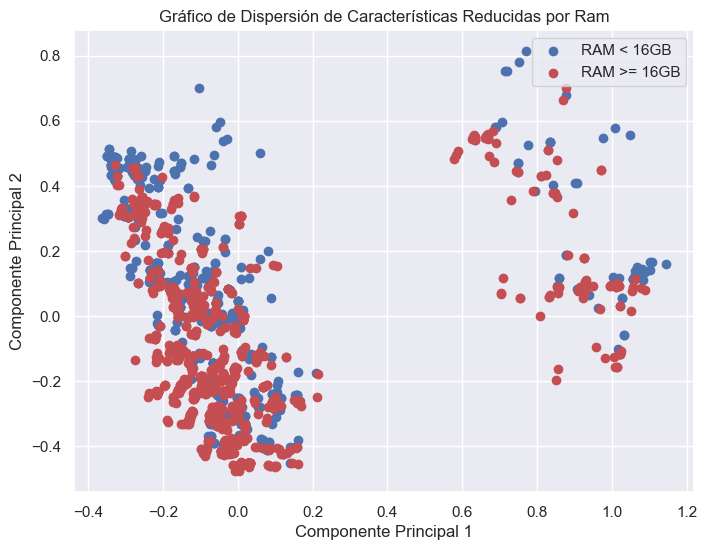

In [751]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[y_train == -1][:, 0], X_reduced[y_train == -1][:, 1], c='b', label='RAM < 16GB')
plt.scatter(X_reduced[y_train == 1][:, 0], X_reduced[y_train == 1][:, 1], c='r', label='RAM >= 16GB')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersión de Características Reducidas por Ram')
plt.legend()
plt.show()

En un principio, el gráfico de dispersión de los datos a partir de la reducción de dimensionalidad a dos componentes mediante el método PCA nos sirvió como un estimativo sobre la distribución de los datos, y para ver que no eran linealmente separables, lo que nos sirvió para descartar algunos clasificadores como Clasificador Lineal, perceptron y Adaline.

# Clasificación

In [752]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Primer clasificador: Máquina de Vectores de Soporte
### Clasificador SVC con kernel lineal utilizando el dataset original


In [753]:
svc_lin_df = SVC(kernel='linear')
svc_lin_df.fit(X_train, y_train)

SVC(kernel='linear')

En este caso no será posible graficar la función de decisión debido a la gran cantidad de componentes que se tienen en cuenta.

### Exactutud de la función de decisión para los valores de entrenamiento

In [754]:
predicciones_entrenamiento_lineal_df = svc_lin_df.predict(X_train)

# Calcular la precisión de las predicciones
accuracy_entrenamiento_lineal_df = accuracy_score(y_train, predicciones_entrenamiento_lineal_df)
print(f'Exactitud en los datos de entrenamiento: {accuracy_entrenamiento_lineal_df:.2f}')

Exactitud en los datos de entrenamiento: 0.86


## Segundo Clasificador: Random Forest

#### Entrenamiento clasificador Random Forest

In [755]:
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 27, class_weight = 'balanced')
rforest.fit(X_train, y_train)

Y_train_pred_test_rforest = rforest.predict(X_train)

In [756]:
accuracy_train_random_forest = accuracy_score(y_train, Y_train_pred_test_rforest)
print(f'Exactitud en los datos de validación: {accuracy_train_random_forest:.2f}')

Exactitud en los datos de validación: 0.94


## Predicción

### Predicción clasificador SVC:

In [757]:
predicciones_validacion_lineal_df = svc_lin_df.predict(X_val)
accuracy_validacion_lineal_df = accuracy_score(y_val, predicciones_validacion_lineal_df)
print(f'Exactitud en los datos de validación: {accuracy_validacion_lineal_df:.2f}')

Exactitud en los datos de validación: 0.87


### Predicción clasificador Random Forest:

In [758]:
Y_val_pred_rforest = rforest.predict(X_val)

In [759]:
accuracy_val_random_forest = accuracy_score(y_val, Y_val_pred_rforest)
print(f'Exactitud en los datos de validación: {accuracy_val_random_forest:.2f}')

Exactitud en los datos de validación: 0.90


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

En una primera instancia, para esta etapa del análisis separamos el set de datos inicial en dos sets de datos diferentes, uno que contiene el 75% del total de los registros para realizar el entrenamiento de los clasificadores, y el 25% restante se incluyó en el set de datos de validación. La división de los conjuntos de datos se realizó de manera que la proporción de datos respecto a la memoria RAM sea equivalente entre ambos conjuntos de datos.

A continuación, se prepararon los datos de los dos conjuntos de datos obtenidos en el paso anterior, es decir, para ambos conjuntos de datos se separaron los vectores de entrada y los vectores de la variable objetivo.

#### Ajuste de parámetros
Para ambos clasificadores, después de probar con varios valores para sus respectivos parámetros, decidimos que lo mejor era dejar sus parámetros por defecto debido a que fueron los que mejores resultados nos dieron.

### Clasificadores elegidos:
### SVM
Las máquinas de vectores de soporte o máquinas de vector soporte son un conjunto de algoritmos de aprendizaje supervisado. Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Una SVM representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando se necesita una máquina de vectores de soporte para realizar una clasificación se denomina Clasificador de Vectores de Soporte (SVC).
Se eligió este clasificador debido a que al aumentar la dimensionalidad de los vectores de características durante el entrenamiento permite obtener mejores resultados que utilizando otros clasificadores clásicos como los Clasificadores Lineales, además, al poder elegir el kernel a utilizar le da más flexibilidad.
#### Decisión sobre kernel SVC a usar:
Al principio parecía que el kernel radial iba a dar mejores resultados, pero por la forma de la curva es propenso a un sobreentrenamiento.
Además, es necesario hacer un análisis de la importancia de cada característica para cada clasificador usado, y scikit learn tiene varias opciones para esto (incluyendo la posibilidad de conocer el valor de los pesos w) para el kernel lineal que no están disponibles para el kernel radial.

### Clasificador Random Forest
En Random Forest se ejecutan varios algoritmos de árbol de decisiones en lugar de uno solo. Para clasificar un nuevo objeto basado en atributos, cada árbol de decisión da una clasificación y finalmente la decisión con mayor “votos” es la predicción del algoritmo.

Hemos definido una profundidad máxima de cada árbol de 27 niveles ya que luego de realizar pruebas los resultados fueron lo suficientemente buenos, principalmente en comparación con el clasificador SVC.


## Análisis de la importancia de cada característica

Se obtiene la matriz de correlación de todas las columnas del dataset utilizadas para el análisis con respecto a la columna RAM, a partir de esta matriz podremos determinar si existe alguna correlación (ya sea directa o inversa) entre cada una de las características del dataset y la RAM.
En lugar de utilizar el dataset completo, utilizaremos únicamente el dataset de entrenamiento debido a que es el que nos interesa para el cálculo de los coeficientes.

In [760]:
correlacion_ram = df_train.corrwith(df_train['RAM'])
correlacion_ram

Brand           0.135158
Model           0.216519
CPU             0.234162
RAM             1.000000
Storage         0.646392
Storage type   -0.188092
GPU             0.417715
Screen          0.190794
Touch           0.028171
dtype: float64

### Mapa de calor de la matriz de correlación

In [761]:


correlation_df = pd.DataFrame(correlacion_ram, columns=['Correlation']).sort_values('Correlation').dropna()

correlation_df_size = correlation_df.size
lim_inf = lim_sup = 0
incremento = 50
rangos = list()
for i in range(0,int((correlation_df_size/incremento))+1):

    lim_inf = i*incremento
    lim_sup = ((i+1)*incremento)-1
    if lim_sup >= correlation_df_size:
        lim_sup = correlation_df_size-1
    rangos.append((lim_inf, lim_sup))




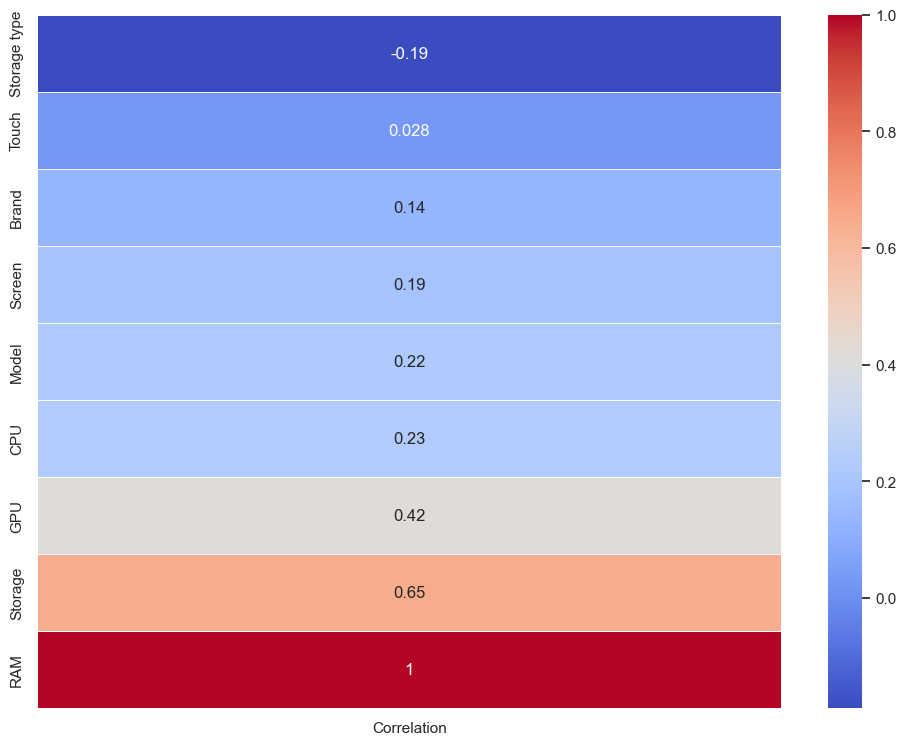

In [762]:
for rango in rangos:
    plt.figure(figsize=(12, 9))
    sns.heatmap(correlation_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()

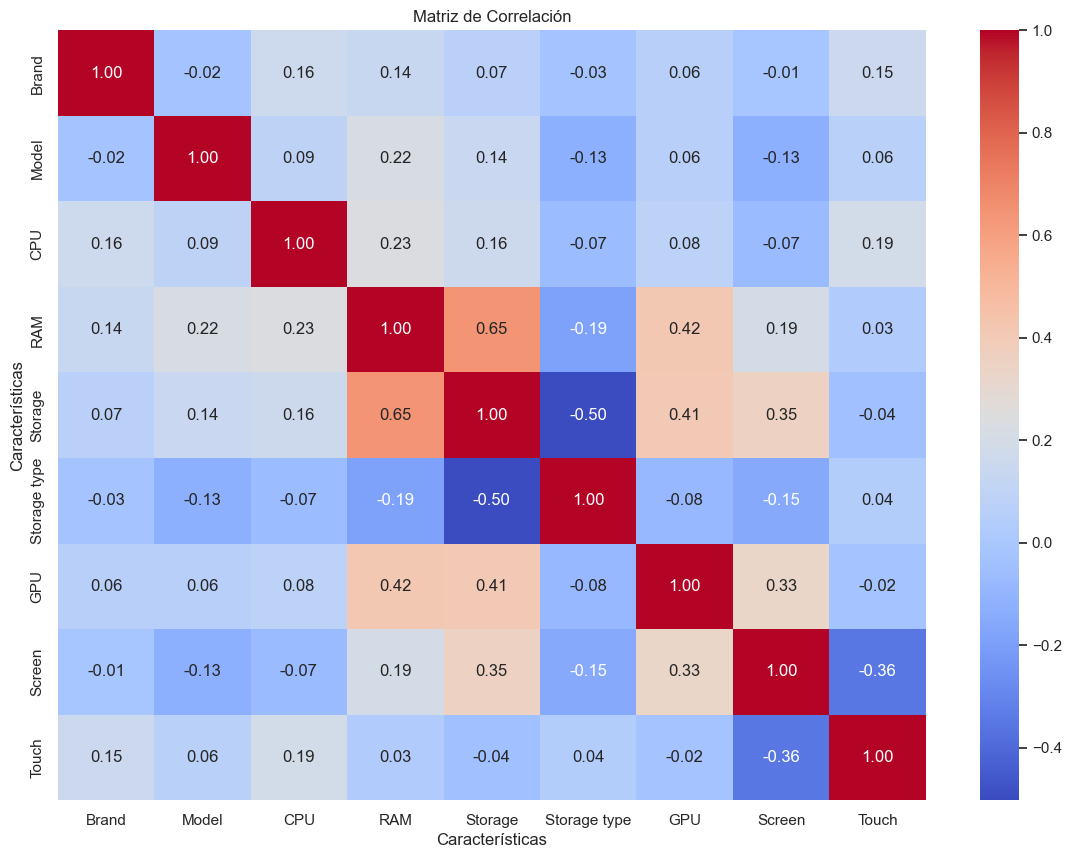

In [763]:
corr = df_train.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(14, 10))

# Utiliza seaborn para crear un mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Configura etiquetas de ejes y título
plt.xlabel('Características')
plt.ylabel('Características')
plt.title('Matriz de Correlación')

# Muestra el mapa de calor
plt.show()


### Análisis de características más importantes a partir de los coeficientes de la función de decisión del clasificador SVC con kernel lineal

In [764]:
column_names = X_train.columns

coef_df = pd.DataFrame({'Característica': column_names, 'Coeficiente': svc_lin_df.coef_[0]})

coef_df['Abs_Coeficiente'] = coef_df['Coeficiente'].abs()  # Agregar columna con valores absolutos
coef_df = coef_df.sort_values(by='Abs_Coeficiente', ascending=False)

coef_df.head(10)

,Característica,Coeficiente,Abs_Coeficiente
3,Storage,9.349112,9.349112
5,GPU,3.311780,3.311780
2,CPU,1.711889,1.711889
1,Model,1.413867,1.413867
0,Brand,0.625248,0.625248
7,Touch,-0.053534,0.053534
6,Screen,0.000004,0.000004
4,Storage type,0.000000,0.000000


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección
Después de analizar tanto la correlación que existe entre las distintas características, y la característica objetivo RAM, podemos ver que las más significativas para el análisis son "Storage", "GPU" y "CPU", de las cuales "Storage" y "GPU" sobresalen con una diferencia considerable sobre las demás. Además, el signo positivo de la correlación de estas tres características respecto a RAM nos indica que su relación es directamente proporcional.

Además de analizar la matriz de correlación, también realizamos un análisis sobre los coeficientes de la función de decisión del clasificador SVC, el cual coincide con la matriz de correlación en que "Storage", "GPU" y "CPU" son las características más importantes asignándoles un peso superior que las demás, resaltando nuevamente la importancia de "Storage" y "GPU" asignándoles pesos significativamente mayores que los de las demás características.

# Evaluación

Por cada modelo de clasificación utilizado calcular:

## Matriz de confusión


In [765]:

confusion = confusion_matrix(y_val, predicciones_validacion_lineal_df)
print("Matriz de Confusión:")
print(confusion)

accuracy = accuracy_score(y_val, predicciones_validacion_lineal_df)
print("Exactitud:", accuracy)


Matriz de Confusión:
[[175  42]
 [ 27 286]]
Exactitud: 0.869811320754717


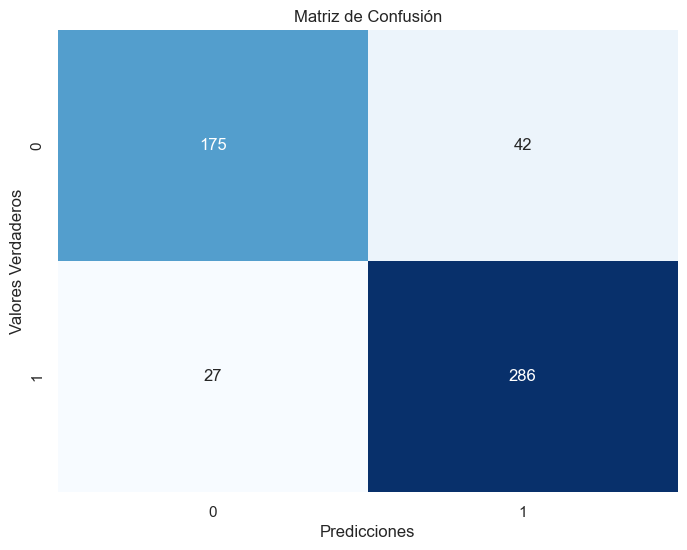

In [766]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Agrega etiquetas y títulos
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección
A partir de la matriz de confución del clasificador SVC, podemos ver que, de los 202 elementos que clasificaron como computadoras con 16GB o más de RAM, 175 se clasificaron bien, mientras que 27 en realidad tenían menos de 16GB de RAM.
De los 328 elementos que se clasificaron como computadoras con menos de 16GB de RAM, 286 se clasificaron correctamente, mientras que 42 en realidad tenían 16GB o más de RAM.

### Matriz de Confusión para clasificador Random Forest


In [767]:
confusion_rf = confusion_matrix(y_val, Y_val_pred_rforest)
print("Matriz de Confusión:")
print(confusion_rf)

accuracy_rf = accuracy_score(y_val, Y_val_pred_rforest)
print("Exactitud:", accuracy_rf)

Matriz de Confusión:
[[200  17]
 [ 34 279]]
Exactitud: 0.9037735849056604


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

A partir de la matriz de confución del clasificador Random Forest, podemos ver que, de los 232 elementos que clasificaron como computadoras con 16GB o más de RAM, 200 se clasificaron bien, mientras que 32 en realidad tenían menos de 16GB de RAM. De los 298 elementos que se clasificaron como computadoras con menos de 16GB de RAM, 281 se clasificaron correctamente, mientras que 17 en realidad tenían 16GB o más de RAM.

## Accuracy, Precision, Recall, F-score

#### Accuracy para clasificador SVC

In [768]:
accuracy_svc = accuracy_score(y_val, predicciones_validacion_lineal_df)
print(f"Exactitud SVC: {accuracy_svc}")

Exactitud SVC: 0.869811320754717


#### Accuracy para clasificador Random Forest

In [769]:
accuracy_rf = accuracy_score(y_val, Y_val_pred_rforest)
print(f"Exactitud Random Forest: {accuracy_rf}")

Exactitud Random Forest: 0.9037735849056604


In [770]:
precision_class_1 = precision_score(y_val, predicciones_validacion_lineal_df, pos_label=1, average='binary')
precision_class_minus_1 = precision_score(y_val, predicciones_validacion_lineal_df, pos_label=-1, average='binary')

print("Precisión Ram >= 16GB:", precision_class_1)
print("Precisión Ram < 16GB:", precision_class_minus_1)

# Calcula el recall por clase
recall_class_1 = recall_score(y_val, predicciones_validacion_lineal_df, pos_label=1, average='binary')
recall_class_minus_1 = recall_score(y_val, predicciones_validacion_lineal_df, pos_label=-1, average='binary')

print("Recall Ram >= 16GB:", recall_class_1)
print("Recall Ram < 16GB:", recall_class_minus_1)

# Calcula el F1-score por clase
f1_class_1 = f1_score(y_val, predicciones_validacion_lineal_df, pos_label=1, average='binary')
f1_class_minus_1 = f1_score(y_val, predicciones_validacion_lineal_df, pos_label=-1, average='binary')

print("F1-score Ram >= 16GB:", f1_class_1)
print("F1-score Ram < 16GB:", f1_class_minus_1)

Precisión Ram >= 16GB: 0.8719512195121951
Precisión Ram < 16GB: 0.8663366336633663
Recall Ram >= 16GB: 0.9137380191693291
Recall Ram < 16GB: 0.8064516129032258
F1-score Ram >= 16GB: 0.8923556942277691
F1-score Ram < 16GB: 0.8353221957040572


Las métricas se deben calcular para los dos datasets. La valoración del resultado se hace con las métricas del dataset de validación, pero es útil compararlas con las del dataset de entrenamiento para determinar la magnitud del sobreajuste.

#### Precisión, recall y F1-Score para el clasificador SVC

In [771]:
from sklearn.metrics import classification_report

# Supongamos que ya tienes tus predicciones y valores verdaderos (y_pred, y_true)
# Calcula el informe de clasificación
report = classification_report(y_val, predicciones_validacion_lineal_df, output_dict=True)

# Convierte el informe de clasificación en un DataFrame
metrics_df = pd.DataFrame(report).transpose()

# Renombra las columnas para mayor claridad
metrics_df = metrics_df.rename(columns={'f1-score': 'F1-Score', 'support': 'Soporte'})

# Muestra el DataFrame
print(metrics_df)
print("Con:\n-1: Ram < 16GB\n1: Ram >= 16GB")

              precision    recall  F1-Score     Soporte
-1             0.866337  0.806452  0.835322  217.000000
1              0.871951  0.913738  0.892356  313.000000
accuracy       0.869811  0.869811  0.869811    0.869811
macro avg      0.869144  0.860095  0.863839  530.000000
weighted avg   0.869652  0.869811  0.869004  530.000000
Con:
-1: Ram < 16GB
1: Ram >= 16GB


#### Precisión, recall y F1-Score para el clasificador Random Forest

In [772]:
report_rf = classification_report(y_val, Y_val_pred_rforest, output_dict=True)

# Convierte el informe de clasificación en un DataFrame
metrics_df_rf = pd.DataFrame(report_rf).transpose()

# Renombra las columnas para mayor claridad
metrics_df_rf = metrics_df_rf.rename(columns={'f1-score': 'F1-Score', 'support': 'Soporte'})

# Muestra el DataFrame
print(metrics_df_rf)
print("Con:\n-1: Ram < 16GB\n1: Ram >= 16GB")

              precision    recall  F1-Score     Soporte
-1             0.854701  0.921659  0.886918  217.000000
1              0.942568  0.891374  0.916256  313.000000
accuracy       0.903774  0.903774  0.903774    0.903774
macro avg      0.898634  0.906516  0.901587  530.000000
weighted avg   0.906592  0.903774  0.904244  530.000000
Con:
-1: Ram < 16GB
1: Ram >= 16GB


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

En esta sección se calcularon las métricas "accuracy", "precision", "recall" y "F1-Score" para cada clase de forma individual sobre ambos clasificadores.
#### Clasificador SVC
Para la clase Ram < 16GB:
La precisión de 0.866 nos indica que, el 86% de las predicciones positivas hechas por el clasificador son correctas (verdaderos positivos), lo que indica una buena precisión. Y el recall de 0.807 nos indica qué, el clasificador identifica el 81% de todos los elementos positivos en la población total.

Para la clase Ram >= 16GB:
La precisión de 0.872 nos indica que, el 87% de las predicciones positivas hechas por el clasificador son correctas. Y el recall de 0.91 nos indica qué, el clasificador identifica el 91% de todos los elementos positivos en la población total.

La exactitud (accuracy) de 0.87 nos indica que el clasificador fue capaz de clasificar con éxito el 87% de los elementos de la población total.

### Clasificador Random Forest
Para la clase Ram < 16GB:
La precisión de 0.854 nos indica que, el 85.4% de las predicciones positivas hechas por el clasificador son correctas (verdaderos positivos), lo que indica una buena precisión. Y el recall de 0.917 nos indica qué, el clasificador identifica el 92% de todos los elementos positivos en la población total. El F1-Score de 0.88 indica un buen equilibrio entre la precisión y el recall. Esto significa que el clasificador logra un 88% de equilibrio entre la capacidad de hacer predicciones positivas correctas (precisión) y la capacidad de identificar correctamente los casos positivos en la población total.

Para la clase Ram >= 16GB:
La precisión de 0.94 nos indica que, el 94% de las predicciones positivas hechas por el clasificador son correctas. Y el recall de 0.89 nos indica qué, el clasificador identifica el 89% de todos los elementos positivos en la población total. El F1-Score de 0.91 indica un buen equilibrio entre la precisión y el recall. Esto significa que el clasificador logra un 91% de equilibrio entre la capacidad de hacer predicciones positivas correctas (precisión) y la capacidad de identificar correctamente los casos positivos en la población total.

La exactitud (accuracy) de 0.9 nos indica que el clasificador fue capaz de clasificar con éxito el 90% de los elementos de la población total.

Cabe aclarar que para calcular las métricas de ambos clasificadores se utilizaron los valores de los conjuntos de datos de validación.


## Curva ROC

In [773]:
from sklearn.metrics import roc_curve, roc_auc_score

### Curva ROC para clasificador SVC

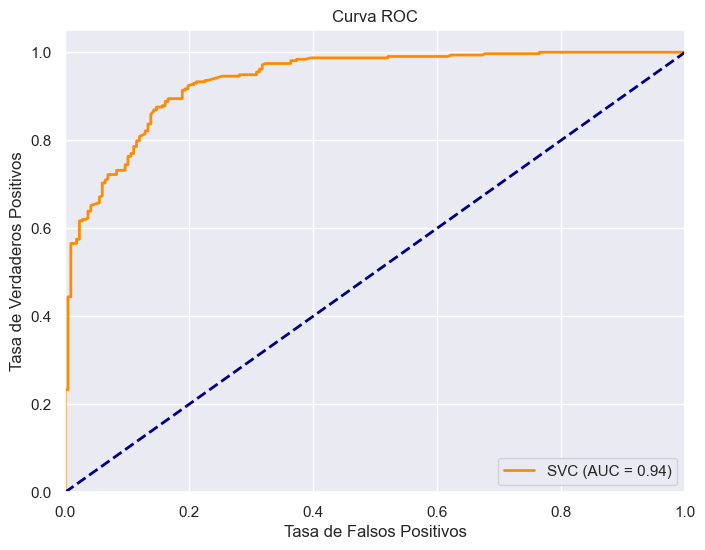

In [774]:
# Calcula las puntuaciones de probabilidad para la clase positiva
y_scores = svc_lin_df.decision_function(X_val)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = roc_auc_score(y_val, y_scores)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Curva ROC para clasificador Random Forest


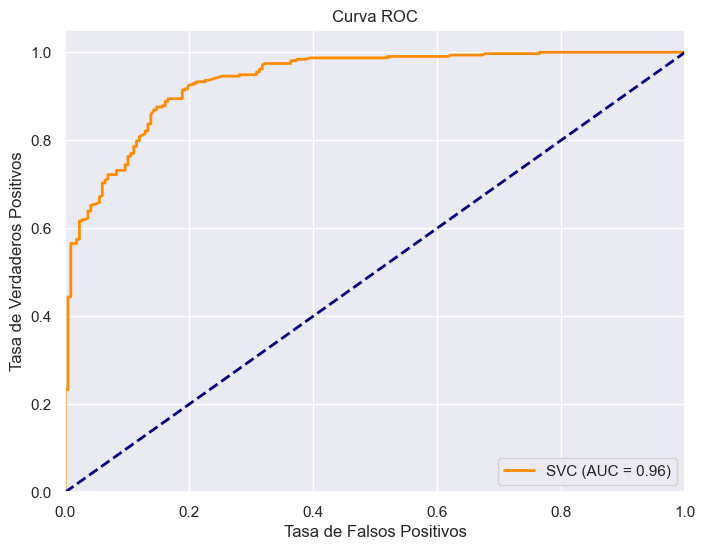

In [775]:
# Calcula las puntuaciones de probabilidad para la clase positiva
y_scores_forest = rforest.predict_proba(X_val)[:, 1]

# Calcula la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_val, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = roc_auc_score(y_val, y_scores_forest)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, color='darkorange', lw=2, label=f'SVC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

En las figuras de arriba graficamos las curvas ROC para ambos clasificadores. En el caso del clasificados SVC tenemos un AUC de 0.94, y para el Random Forest es de 0.96, en ambos casos el valor es muy bueno (muy carcanos a 1), pero el clasificador Random Forest se comporta un poco mejor.
En ambos casos la curva nos indica que la tasa de verdaderos positivos es alta en comparacipon de la tasa de falsos positivos en una amplia gama de umbrales de decisión, lo que indica que los clasificadores son muy efectivos en indicar casos positivos y limita la cantidad de falsos positivos.

# Conclusiones

Luego de haber trabajado con 2 clasificadores o redes neuronales(Random forest y SVC) podemos concluir con respecto a las métricas calculadas en base a los datos de validación que el clasificador Random Forest es el que mejor rendimiento nos ofrece para esta situación en particular.

Podemos concluir que utilizando el modelo generado por el clasificador SVC seremos capaces de predecir con una exactitud del 87% si una laptop está equipada de menos de 16 GB de RAM o con 16 GB o más de memoria RAM, mientras que  si utiizamos el modelo generado de clasificador Random Forest podremos clasificar las mismas laptops con una exactitud del 90,5%.

Resultados obtenidos:

A partir de la ejecución del modelo del clasificador Random Forest, utilizando los datos de validación obtuvimos que de los 232 elementos que clasificaron como computadoras con 16GB o más de RAM, 200 se clasificaron bien, mientras que 32 en realidad tenían menos de 16GB de RAM. De los 298 elementos que se clasificaron como computadoras con menos de 16GB de RAM, 281 se clasificaron correctamente, mientras que 17 en realidad tenían 16GB o más de RAM.

Por lo mencionado anteriormente recomendamos que se utilice el modelo generado por el clasificador Random Forest debido a que es capaz de realizar predicciones más confiables.

# Informe


## Descripción de los datos y del problema

Para realizar el presente análisis contamos con un conjunto de datos que representa un listado de laptops en donde se detallan sus características técnicas incluyendo el modelo de CPU, la cantidad de memoria RAM instalada, la capacidad de almacenamiento y su tipo, el procesador gráfico, tamaño de pantalla  y si cuenta con pantalla tactil o no.

La problemática que se presentó a partir de este conjunto de datos, ser capaces de predecir si determinada laptop tiene 16 GB o más.

Para poder cumplir con el objetivo nuestra primera tarea fue realizar un preprocesamiento sobre los datos presentes en el conjunto de datos para poder darles el formato completo para realizar la clasificación. Dentro de las actividades realizadas se incluyen el análisis de la distribución de los distintos valores de las características de cada laptop que conforma el conjunto de datos. Además de esto se realizó un análisis de los valores faltantes sobre los cuales se decidió eliminar algunos valores, completar otros y para los restantes se decidió tomar la ausencia de valores como un dato válido.

Debido a que la mayor parte de las características de las laptop son categóricas fue necesario realizar una codificación sobre las mismas para que pueden ser procesadas de forma matemática. Además, notamos que algunas de las características presentes no eran significativas para el análisis por lo que tomamos la decisión de eliminarlas.

Una vez que obtuvimos los datos con el formato adecuado, el siguiente paso fue dividir el conjunto de datos en dos conjuntos distintos para poder realizar el entrenamiento y la validación de los modelos.

Por otro lado, los clasificadores que decidimos utilizar fueron un Clasificador de Vectores de Soporte (SVC) y un Clasificador basado en Bosques Aleatorios (Random Forest).

Por un lado, se eligió el clasificador SVC debido a que las SVMs han resultado ser unos de los mejores clasificadores para un amplio abanico de situaciones, por lo que consideran uno de los referentes en el ámbito de Maching Learning. Estos clasificadores permiten clasificar problemas o grupos que en su espacio de dimensiones original no son linealmente separables al aumentar la dimensionalidad de los vectores de características durante el entrenamiento. Además, nos brinda flexibilidad al poder aplicar distintas funciones kernel.

También, optamos por el clasificador de Bosques Aleatorios que es un metaestimador qu ajusta un conjunto de clasificadores de arbol de decisión sobre varias sub-muestras del dataset original y utiliza promedios para mejorar la exactitud de las predicciones y controlar el sobreentrenamiento.

Una de las principales ventajas de Random Forest es que es un método versátil de aprendizaje automático capaz de realizar tanto tareas de regresión como de clasificación. 

En Random Forest se ejecutan varios algoritmos de árbol de decisiones en lugar de uno solo. Para clasificar un nuevo objeto basado en atributos, cada árbol de decisión da una clasificación y finalmente la decisión con mayor “votos” es la predicción del algoritmo.

### Problemas encontrados en el camino

El problema más significativo que encontramos fue la decisión sobre el método de codificación a utilizar para las variables categóricas. 

### Conclusión

Luego de finalizar el trabajo práctico sentimos que, como equipo, hemos aprendido mucho en cuanto a distintos métodos de clasificación, pudiendo ver algunas ventajas y desventajas de cada uno. Además, nos ayudó a desarrollar las habilidades necesarias para tomar las decisiones correctas en proyectos similares que pueden ser aplicables en casos de la vida real.

Por otro lado, el trabajo nos permitio poner en práctica todos los conocimientos teóricos adquiridos durante el cursado de la materia.
